In [95]:
import torch

In [96]:
import numpy as np

In [ ]:
inputs =np.array( [
    [13, 5, 5],
    [12, 34, 7],
    [9, 16, 42],
    [23, 1, 37],
    [18, 28, 45],
    [5, 33, 10],
    [25, 8, 29],
    [14, 47, 2],
    [40, 19, 21]
])

targets=np.array([
    [4, 5],
    [23, 6],
    [15, 8],
    [21, 33],
    [9, 44],
    [28, 2],
    [30, 12],
    [17, 46],
    [38, 1]
])

inputs=torch.tensor(inputs,dtype=torch.float32)
targets=torch.tensor(targets,dtype=torch.float32)

weights=torch.randn(2,3,requires_grad=True)

weights

bias=torch.randn(2,requires_grad=True)

def model(x):
    return x @ weights.t() + bias

In [84]:
preds=model(inputs)

In [104]:
def loss(target,pred):
    diff=pred-target
    print(diff)
    mse=torch.sum(diff**2)/diff.numel()
    return mse

In [86]:
loss_value=loss(preds,targets)

tensor([[ 23.0885,  15.2410],
        [ 27.2025, -21.5599],
        [ 68.5114,  19.3952],
        [ 93.2162,  75.9326],
        [ 70.0792,  50.7499],
        [ 28.1971, -29.9777],
        [ 90.8835,  43.6392],
        [ 10.1965,   0.9177],
        [100.6101,  29.7192]], grad_fn=<SubBackward0>)


In [87]:
loss_value.backward()

In [88]:
weights.grad

tensor([[-1247.6455,  -915.5940, -1648.5222],
        [ -546.2919,  -124.2298,  -824.9818]])

In [89]:
weights.grad.zero_()
bias.grad.zero_()

tensor([0., 0.])

In [90]:
preds=model(inputs)
loss_value=loss(preds,targets)
loss_value.backward()

tensor([[ 23.0885,  15.2410],
        [ 27.2025, -21.5599],
        [ 68.5114,  19.3952],
        [ 93.2162,  75.9326],
        [ 70.0792,  50.7499],
        [ 28.1971, -29.9777],
        [ 90.8835,  43.6392],
        [ 10.1965,   0.9177],
        [100.6101,  29.7192]], grad_fn=<SubBackward0>)


In [91]:
with torch.no_grad():
    weights=weights-weights.grad * 1e-5
    bias=bias-bias.grad * 1e-5
    weights.grad.zero_()
    bias.grad.zero_()

AttributeError: 'NoneType' object has no attribute 'zero_'

In [115]:
inputs =np.array( [
    [13, 5, 5],
    [12, 34, 7],
    [9, 16, 42],
    [23, 1, 37],
    [18, 28, 45],
    [5, 33, 10],
    [25, 8, 29],
    [14, 47, 2],
    [40, 19, 21]
])

targets=np.array([
    [4, 5],
    [23, 6],
    [15, 8],
    [21, 33],
    [9, 44],
    [28, 2],
    [30, 12],
    [17, 46],
    [38, 1]
])

inputs=torch.tensor(inputs,dtype=torch.float32)
targets=torch.tensor(targets,dtype=torch.float32)

weights=torch.zeros(2,3,requires_grad=True)

weights

bias=torch.zeros(2,requires_grad=True)

def model(x):
    return x @ weights.t() + bias

def loss(target,pred):
    diff=pred-target
    mse=torch.sum(diff**2)/diff.numel()
    return mse

loss_hist=[]

for i in range(30000):
    preds = model(inputs)
    loss_value = loss(preds , targets)
    loss_hist.append(loss_value.item())
    print(f'Epochs : {i} , Loss : {loss_value.item()}')
    loss_value.backward()
    with torch.no_grad():
        weights -= weights.grad * 1e-5
        bias -= bias.grad * 1e-5
        weights.grad.zero_()
        weights.grad.zero_()

Epochs : 0 , Loss : 562.4444580078125
Epochs : 1 , Loss : 551.904052734375
Epochs : 2 , Loss : 541.6403198242188
Epochs : 3 , Loss : 531.6460571289062
Epochs : 4 , Loss : 521.9142456054688
Epochs : 5 , Loss : 512.4380493164062
Epochs : 6 , Loss : 503.2107849121094
Epochs : 7 , Loss : 494.22601318359375
Epochs : 8 , Loss : 485.4772644042969
Epochs : 9 , Loss : 476.95855712890625
Epochs : 10 , Loss : 468.6637268066406
Epochs : 11 , Loss : 460.5870361328125
Epochs : 12 , Loss : 452.7227783203125
Epochs : 13 , Loss : 445.0653076171875
Epochs : 14 , Loss : 437.609375
Epochs : 15 , Loss : 430.349609375
Epochs : 16 , Loss : 423.2808837890625
Epochs : 17 , Loss : 416.3982238769531
Epochs : 18 , Loss : 409.69677734375
Epochs : 19 , Loss : 403.1717834472656
Epochs : 20 , Loss : 396.8186950683594
Epochs : 21 , Loss : 390.6329040527344
Epochs : 22 , Loss : 384.610107421875
Epochs : 23 , Loss : 378.74603271484375
Epochs : 24 , Loss : 373.0365295410156
Epochs : 25 , Loss : 367.47747802734375
Epochs 

In [117]:
import seaborn as sn

<Axes: >

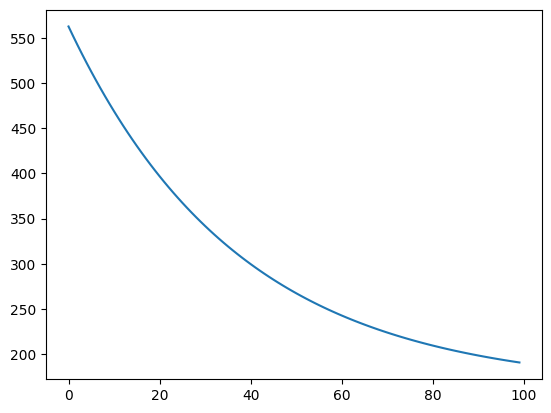

In [122]:
sn.lineplot(x=range(100),y=loss_hist[:100])